In [1]:
import os
import pandas as pd
import numpy as np
import re
import json
from numpy import NaN
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from numpy import NaN
from operator import index

In [2]:
# Import json data and create a pandas data frame
data_location = '/home/juliendesmedt/Documents/becode/immo_web_project/immoweb_data_analysis/data'
os.chdir(data_location)

with open("all_data.json", "r") as read_file:

    data = json.load(read_file)
df = pd.DataFrame.from_dict(data).drop_duplicates()

os.chdir('/home/juliendesmedt/Documents/becode/immo_web_project/immoweb_data_analysis')



In [3]:
#convert objects to string
df = df.convert_dtypes(infer_objects=True, \
                             convert_string=True, \
                             convert_integer=True, \
                             convert_boolean=True, \
                             convert_floating=True)

#clean columns names and select data set 
#define data wanted data we want

select_cols = ['garden_area','terrace_area', 'locality','type_of_property', 'subtype_of_property', 'type_of_sale', 'zip_code', 'url','state_of_the_building', 'terrace', 'open_fire', 'swimming_pool', 'price', 'garden', 'number_of_facades', 'number_of_rooms', 'fully_equipped_kitchen', 'area', 'furnished', 'surface_of_the_land']
rename_slect_cols = { 'Price' : 'price',  'Bedrooms': 'number_of_rooms', 'Living area': 'area' , 'Kitchen type': 'fully_equipped_kitchen' ,  'Furnished': 'furnished' , 'Terrace surface': 'terrace_area', 'Garden surface': 'garden_area', 'Surface of the plot': 'surface_of_the_land', 'Number of frontages': 'number_of_facades',  'Swimming pool': 'swimming_pool', 'Building condition': 'state_of_the_building', 'How many fireplaces?': 'open_fire' }

df = df.rename(columns= rename_slect_cols)

for i in select_cols:
     if i not in df.columns:
         df[i] = None

df2 = df[select_cols]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 18478
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   garden_area             4169 non-null   string
 1   terrace_area            8016 non-null   string
 2   locality                17373 non-null  string
 3   type_of_property        17373 non-null  string
 4   subtype_of_property     17373 non-null  string
 5   type_of_sale            17373 non-null  string
 6   zip_code                17373 non-null  string
 7   url                     17373 non-null  string
 8   state_of_the_building   14244 non-null  string
 9   terrace                 0 non-null      object
 10  open_fire               933 non-null    string
 11  swimming_pool           7389 non-null   string
 12  price                   16855 non-null  string
 13  garden                  0 non-null      object
 14  number_of_facades       13074 non-null  string
 15  nu

In [4]:
# text exploration ['area', 'garden_area', 'terrace_area','surface_of_the_land']
df3 = df2
from curses.ascii import isalpha
column_name = 'area'

df3.loc[df3[column_name].notna(), column_name +'_text'] = 'numeric'
df3.loc[df3[column_name].str.isalpha(), column_name +'_text'] = 'alpha'
df3.loc[df3[column_name].isna(), column_name +'_text'] = 'na'

print(df3[[column_name +'_text', column_name]].loc[df3[column_name +'_text']=='numeric'].head(3))
print(df3[column_name].info())

## We can conclude that regarding the terrace if there is content there is aterrace if not we assume no


  area_text                  area
0   numeric  122 m² square meters
1   numeric  119 m² square meters
2   numeric  200 m² square meters
<class 'pandas.core.series.Series'>
Int64Index: 17373 entries, 0 to 18478
Series name: area
Non-Null Count  Dtype 
--------------  ----- 
16062 non-null  string
dtypes: string(1)
memory usage: 271.5 KB
None


/tmp/ipykernel_30757/2832457953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[df3[column_name].notna(), column_name +'_text'] = 'numeric'


In [5]:

#clean garden en terrace
# terrace are
df2['terrace_area'] = df2['terrace_area'].str.extract(r'(\d+)')
df2.loc[df2['terrace_area'].notna(), 'terrace'] = '1'
df2.loc[df2['terrace_area'].isna(), 'terrace'] = '0'
#!!!! assumptions
df2.loc[df2['terrace_area'].isna(), 'terrace_area'] = '0'
df2['terrace'] = df2['terrace'].astype('Int64')
df2['terrace_area'] = df2['terrace_area'].astype('Int64')

#garden area
df2['garden_area'] = df2['garden_area'].str.extract(r'(\d+)')
df2.loc[df2['garden_area'].notna(), 'garden'] = '1'
df2.loc[df2['garden_area'].isna(), 'garden'] = '0'
df2.loc[df2['garden_area'].isna(), 'garden_area'] = '0'
df2['garden'] = df2['garden'].astype('Int64')
df2['garden_area'] = df2['garden_area'].astype('Int64')

# land area
df2['surface_of_the_land'] = df2['surface_of_the_land'].str.extract(r'(\d+)')
df2.loc[df2['surface_of_the_land'].isna(), 'surface_of_the_land'] = '0'
df2['surface_of_the_land'] = df2['surface_of_the_land'].astype('Int64')

#habitable area
df2['area'] = df2['area'].str.extract(r'(\d+)')
df2['area'] = df2['area'].astype('Int64')





/tmp/ipykernel_30757/466845812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['terrace_area'] = df2['terrace_area'].str.extract(r'(\d+)')
/tmp/ipykernel_30757/466845812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['terrace'] = df2['terrace'].astype('Int64')
/tmp/ipykernel_30757/466845812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [6]:
#cleaning type_of_properety & subtype_of_property
house_subtype = ['apartment-block','castle', 'country-cottage','manor-house', 'mansion', 'mixed-use-building', 'exceptional-property','other-property'	 ]
apartment_subtype = ['flat-studio', 'service-flat', 'ground-floor']
df2.loc[df2['subtype_of_property'].isin(house_subtype), 'type_of_property'] = 'house'
df2.loc[df2['subtype_of_property'].isin(apartment_subtype), 'type_of_property'] = 'apartment'

# check if there are other types
#df2[df2['type_of_property']=='other'].groupby(['type_of_property','subtype_of_property'], dropna=False).count()
#df2['subtype_of_property'].info()



In [7]:
# price cleaning
df2.loc[df2['price'].str.contains('Make an offer'), 'bid'] = 1
df2.loc[df2['bid'].isna(), 'bid'] = 0
df2['price'] = df2['price'].str.extractall(r' (\b\d+\b) ').unstack()
df2['bid'] = df2['bid'].astype('Int64')
df2['price'] = df2['price'].astype('Int64')

#type of sale
df.loc[df2['bid']==1, 'type_of_sale' ] = 'bid'

/tmp/ipykernel_30757/487077717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['price'].str.contains('Make an offer'), 'bid'] = 1
/tmp/ipykernel_30757/487077717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'].str.extractall(r' (\b\d+\b) ').unstack()
/tmp/ipykernel_30757/487077717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [8]:
#zip extra info
column_names_zip = ['country_code','zip_code','municipality','region','region_code','province', 'province_code','arrondissement', 'nbr_mun', 'longitude', 'latitude','other']
zip_code = pd.read_csv(data_location+'/be_zipcode.txt', sep="\t", header=None , names=column_names_zip)
zip_code = zip_code[['zip_code','arrondissement','region_code', 'province_code']].drop_duplicates()
zip_code['zip_code'] = zip_code['zip_code'].astype('string')
zip_code[['zip_code','arrondissement']].groupby('zip_code').count()
zip_code[zip_code['zip_code']=='9988']

,zip_code,arrondissement,region_code,province_code
946,9988,Eeklo,VLG,VOV


In [9]:

df_merge = df2.merge(zip_code,how='left', on='zip_code' )

df_merge

,garden_area,terrace_area,locality,type_of_property,subtype_of_property,type_of_sale,zip_code,url,state_of_the_building,terrace,...,number_of_rooms,fully_equipped_kitchen,area,furnished,surface_of_the_land,area_text,bid,arrondissement,region_code,province_code
0,171,20,ans,house,house,bid,4430,https://www.immoweb.be/en/classified/house/for...,Good,1,...,2,Semi equipped,122,No,335,numeric,1,Liège,WAL,WLG
1,0,0,gent,house,house,for-sale,9000,https://www.immoweb.be/en/classified/house/for...,Good,0,...,4,USA installed,119,No,49,numeric,0,Gent,VLG,VOV
2,200,12,woluwe-saint-pierre,house,villa,for-sale,1150,https://www.immoweb.be/en/classified/villa/for...,To renovate,1,...,3,Installed,200,<NA>,300,numeric,0,Arrondissement Brussel-Hoofdstad,BRU,BRU
3,1000,52,galmaarden,house,villa,for-sale,1570,https://www.immoweb.be/en/classified/villa/for...,As new,1,...,4,Hyper equipped,404,No,1000,numeric,0,Halle-Vilvoorde,VLG,VBR
4,140,0,forest,house,apartment-block,for-sale,1190,https://www.immoweb.be/en/classified/apartment...,To be done up,0,...,4,Installed,350,No,263,numeric,0,Arrondissement Brussel-Hoofdstad,BRU,BRU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17368,0,0,dendermonde,apartment,apartment,for-sale,9200,https://www.immoweb.be/en/classified/apartment...,As new,0,...,2,<NA>,126,<NA>,0,numeric,0,Dendermonde,VLG,VOV
17369,0,6,blankenberge,apartment,apartment,for-sale,8370,https://www.immoweb.be/en/classified/apartment...,<NA>,1,...,2,Installed,84,No,0,numeric,0,Brugge,VLG,VWV
17370,0,18,blankenberge,apartment,apartment,for-sale,8370,https://www.immoweb.be/en/classified/apartment...,<NA>,1,...,2,Installed,80,No,0,numeric,0,Brugge,VLG,VWV
17371,0,9,blankenberge,apartment,apartment,for-sale,8370,https://www.immoweb.be/en/classified/apartment...,<NA>,1,...,2,Installed,90,No,0,numeric,0,Brugge,VLG,VWV


In [10]:
# clean open fire data
df2.loc[df2['open_fire'].notna(), 'open_fire'] = '1'
df2.loc[df2['open_fire'].isna(), 'open_fire'] = '0'
df2['open_fire'] = df2['open_fire'].astype('Int64')



/tmp/ipykernel_30757/126187672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['open_fire'] = df2['open_fire'].astype('Int64')


In [11]:
# clean swimming_pool data
df2.loc[df2['swimming_pool'].str.contains('Yes'), 'swimming_pool'] = '1'
df2.loc[(df2['swimming_pool'].isna()) | (df2['swimming_pool'].str.contains('No')), 'swimming_pool'] = '0'
df2['swimming_pool'] = df2['swimming_pool'].astype('Int64')


/tmp/ipykernel_30757/298430311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['swimming_pool'] = df2['swimming_pool'].astype('Int64')


In [12]:
df2[[ 'type_of_sale',
 'url',
 'state_of_the_building', 
 'open_fire',
 'swimming_pool', 
 'number_of_facades',
 'number_of_rooms',
 'fully_equipped_kitchen', 
 
 'furnished',]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 18478
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   type_of_sale            17373 non-null  string
 1   url                     17373 non-null  string
 2   state_of_the_building   14244 non-null  string
 3   open_fire               17373 non-null  Int64 
 4   swimming_pool           17373 non-null  Int64 
 5   number_of_facades       13074 non-null  string
 6   number_of_rooms         17000 non-null  string
 7   fully_equipped_kitchen  12949 non-null  string
 8   furnished               13299 non-null  string
dtypes: Int64(2), string(7)
memory usage: 1.4 MB


In [13]:
#df2[['number_of_facades','url','subtype_of_property']].loc[df2['number_of_facades'].isna()].groupby('subtype_of_property', dropna=False).count()
# for kitchen if contain uninstalled orNot installed = 
df2[['number_of_facades','url','subtype_of_property','type_of_property']].groupby(['number_of_facades','type_of_property'], dropna=False).count()

df2['number_of_facades'] = df2['number_of_facades'].astype('Int64')




/tmp/ipykernel_30757/968107654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['number_of_facades'] = df2['number_of_facades'].astype('Int64')


In [14]:
## for the room check in function of the appartment or house and area
#df2[['number_of_rooms','url','subtype_of_property']].loc[df2['number_of_rooms'].isna()].groupby('subtype_of_property', dropna=False).count()
df2[['number_of_rooms','url','subtype_of_property','type_of_property']].groupby(['number_of_rooms','type_of_property'], dropna=False).count()
df2['number_of_rooms'] = df2['number_of_rooms'].astype('Int64')

/tmp/ipykernel_30757/1157513165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['number_of_rooms'] = df2['number_of_rooms'].astype('Int64')


In [15]:
#cleaning type_of_properety & subtype_of_property
house_subtype = ['apartment-block','castle', 'country-cottage','manor-house', 'mansion', 'mixed-use-building' ]
apartment_subtype = ['flat-studio', 'service-flat']
df2.loc[df2['subtype_of_property'].isin(house_subtype), 'type_of_property'] = 'house'
df2.loc[df2['subtype_of_property'].isin(apartment_subtype), 'type_of_property'] = 'apartment'

In [16]:
# state of the building
to_renovate = ['to restore', 'to renovate']
df2['state_of_the_building'] = df2['state_of_the_building'].str.lower()
df2.loc[df2['state_of_the_building'].isin(to_renovate), 'state_of_the_building'] = 'to renovate'
df2.loc[df2['state_of_the_building'].str.contains('to be done up'), 'state_of_the_building'] = 'to rebuild'
df2.loc[df2['state_of_the_building'].isna(), 'state_of_the_building'] = 'not mentioned'
df2['state_of_the_building'] = df2['state_of_the_building'].str.lower()



df2[['url','state_of_the_building']].groupby('state_of_the_building', dropna=False).count()

/tmp/ipykernel_30757/154149363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state_of_the_building'] = df2['state_of_the_building'].str.lower()
/tmp/ipykernel_30757/154149363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state_of_the_building'] = df2['state_of_the_building'].str.lower()


,url
state_of_the_building,
as new,4873
good,5280
just renovated,894
not mentioned,3129
to rebuild,1604
to renovate,1593


In [17]:
#df2[['fully_equipped_kitchen','url','subtype_of_property']].loc[df2['fully_equipped_kitchen'].isna()].groupby('subtype_of_property', dropna=False).count()
# for kitchen if contain uninstalled orNot installed = 

df2.loc[~df2['fully_equipped_kitchen'].str.contains('uninstalled|Not'), 'equipped_kitchen'] = 1
df2.loc[df2['fully_equipped_kitchen'].str.contains('uninstalled|Not'), 'equipped_kitchen'] = 0

df2[['equipped_kitchen','url','subtype_of_property','type_of_property','state_of_the_building']].groupby(['equipped_kitchen','state_of_the_building'], dropna=False).count()

#df2['fully_equipped_kitchen'] = df2['fully_equipped_kitchen'].astype('Int64')

/tmp/ipykernel_30757/986168453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[~df2['fully_equipped_kitchen'].str.contains('uninstalled|Not'), 'equipped_kitchen'] = 1


url  subtype_of_property  \
equipped_kitchen state_of_the_building                              
0.0              as new                   55                   55   
                 good                    111                  111   
                 just renovated           21                   21   
                 not mentioned           122                  122   
                 to rebuild              118                  118   
                 to renovate             345                  345   
1.0              as new                 3851                 3851   
                 good                   4180                 4180   
                 just renovated          703                  703   
                 not mentioned          1707                 1707   
                 to rebuild             1060                 1060   
                 to renovate             676                  676   
NaN              as new                  967                  967   
                 good                    989                  989   
                 just renovated          170                  170   
                 not mentioned          1300                 1300   
                 to rebuild              426                  426   
                 to renovate             572                  572   

                                        type_of_property  
equipped_kitchen state_of_the_building                    
0.0              as new                               55  
                 good                                111  
                 just renovated                       21  
                 not mentioned                       122  
                 to rebuild                          118  
                 to renovate                         345  
1.0              as new                             3851  
                 good                               4180  
                 just renovated                      703  
                 not mentioned                      1707  
                 to rebuild                         1060  
                 to renovate                         676  
NaN              as new                              967  
                 good                                989  
                 just renovated                      170  
                 not mentioned                      1300  
                 to rebuild                          426  
                 to renovate                         572

In [18]:
# clean furnished
df2.loc[df2['furnished'].str.contains('Yes'), 'furnished'] = '1'
df2.loc[df2['furnished'].str.contains('No'), 'furnished'] = '0'
df2['furnished'] = df2['furnished'].astype('Int64')

df2[['furnished','url','subtype_of_property','type_of_property','state_of_the_building','terrace']].groupby(['terrace','furnished','type_of_property'], dropna=False).count()



/tmp/ipykernel_30757/2114584755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['furnished'] = df2['furnished'].astype('Int64')


url  subtype_of_property  \
terrace furnished type_of_property                              
0       0         apartment         2295                 2295   
                  house             4422                 4422   
        1         apartment          218                  218   
                  house               86                   86   
        <NA>      apartment         1039                 1039   
                  house             1297                 1297   
1       0         apartment         3407                 3407   
                  house             2652                 2652   
        1         apartment          153                  153   
                  house               66                   66   
        <NA>      apartment          984                  984   
                  house              754                  754   

                                    state_of_the_building  
terrace furnished type_of_property                         
0       0         apartment                          2295  
                  house                              4422  
        1         apartment                           218  
                  house                                86  
        <NA>      apartment                          1039  
                  house                              1297  
1       0         apartment                          3407  
                  house                              2652  
        1         apartment                           153  
                  house                                66  
        <NA>      apartment                           984  
                  house                               754

In [19]:
df2.columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 18478
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   garden_area             17373 non-null  Int64  
 1   terrace_area            17373 non-null  Int64  
 2   locality                17373 non-null  string 
 3   type_of_property        17373 non-null  string 
 4   subtype_of_property     17373 non-null  string 
 5   type_of_sale            17373 non-null  string 
 6   zip_code                17373 non-null  string 
 7   url                     17373 non-null  string 
 8   state_of_the_building   17373 non-null  string 
 9   terrace                 17373 non-null  Int64  
 10  open_fire               17373 non-null  Int64  
 11  swimming_pool           17373 non-null  Int64  
 12  price                   16771 non-null  Int64  
 13  garden                  17373 non-null  Int64  
 14  number_of_facades       13074 non-null

In [20]:
df_nona = df2.dropna()
df_nona.shape


(7688, 23)

In [9]:
df2.isna().stack().reset_index().sort_values(0, ascending=False)

,level_0,level_1,0
165043,9011,open_fire,True
171052,9351,fully_equipped_kitchen,True
171056,9351,Row_noNa,True
171057,9352,garden_area,True
171058,9352,terrace_area,True
...,...,...,...
163601,8935,price,False
163602,8935,number_of_facades,False
163603,8935,number_of_rooms,False
53202,2844,locality,False


/home/juliendesmedt/.local/lib/python3.8/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot: xlabel='Count', ylabel='level_1'>

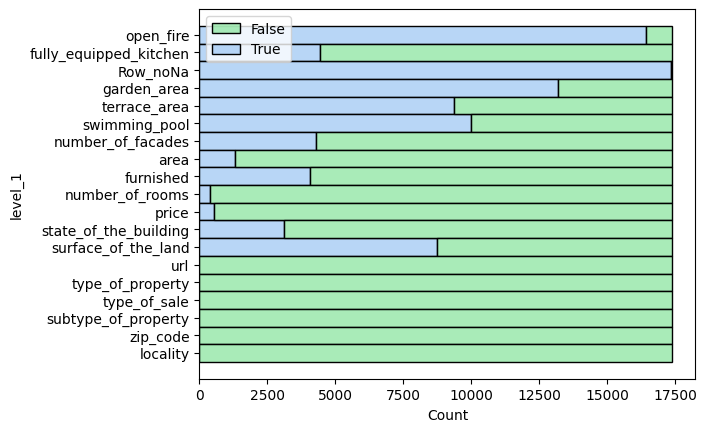

In [23]:
#df2 = df2.drop(['terrace', 'garden', ],axis=1)
#df2['row_has_Na'] = df2.isna().any(axis=1)
sns.set_palette("pastel")
df2.loc[(df2.isna().any(axis=1))==False, 'Row_noNa'] = '1'
result = df2.isna().stack().reset_index()[['level_1',0]].groupby('level_1').agg({0:'sum', 'level_1':'count'}).sort_values(0)
sns.histplot(df2.isna().stack().reset_index().sort_values(0, ascending=False),y='level_1', hue=0, multiple="stack", palette=["C2", "C0"])